In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys
import glob
import os
import peakutils
import datetime
import warnings
import logging
from jupyterthemes import jtplot

In [194]:
from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *
from xps.xps_fits import *


jtplot.style('default', grid=False)
logging.getLogger().setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore")

plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['font.size'] = 18
plt.rc('font', size= 18)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 18)
plt.rc('xtick.major', size=6)
plt.rc('ytick.major', size=6)

plt.rc('ytick', labelsize= 18)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)

plt.rcParams["xtick.major.size"] = 8
plt.rcParams["xtick.major.size"] = 8
plt.rcParams['axes.edgecolor'] = '0.'
plt.rcParams['axes.labelcolor'] = '0.'
plt.rcParams['xtick.color'] = '0.'
plt.rcParams['ytick.color'] = '0.'
plt.rcParams['text.color'] = '0.'
plt.rcParams['axes.linewidth'] = 1.6
plt.rcParams['lines.linewidth'] = 4
plt.rcParams["xtick.major.size"] = 10
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["xtick.minor.size"] = 6
plt.rcParams["ytick.minor.size"] = 6
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["xtick.major.width"] = 2

In [3]:
asf = dict({'C_1s' : 0.296, 'O_1s' : 0.711, 'N_1s' : 0.477, 'Ba_3d' : 7.49,
            'Cu_2p' : 5.321, 'Cl_2p' : 0.891})

## Pre-processing of data Ru-fluorophore on qITO
1- Preparation ex-situ (May 2021)

## Import data

In [14]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/**/*.xy'
files = glob.glob(path, recursive=True)
files.sort()
files_new = []
for f in files:
    if (' ' not in f) and ('/proc' not in f):
        files_new.append(f)

files = files_new
for f in files:
    print(f)

/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/20210415_1-qITO_clean.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/20210607_EDI068-qITO_Ru++.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/20210607_EDI069-qITO_APTES_Ru++.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_07_08_qITO_Ru_Ir/20210707_ITO_aDEA_EDI_079.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_07_08_qITO_Ru_Ir/20210708_AAN050_EDI076-qITO_APTES_Ir+.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_07_08_qITO_Ru_Ir/20210708_EDI081-qITO_APTES_Ru++.xy


In [15]:
experiments = [xps_data_import(path=f) for f in files]
# cols = ['r', 'b', 'g']
# for xp, c in zip(experiments, cols):
#     xp.color = c

# Align spectra

In [6]:
shift = find_shift(experiments[1], experiments[0], region='O1s')
shift

-3.6000000000000227

In [7]:
shift = find_shift(experiments[2], experiments[0], region='O1s')
shift

-0.3000000000000682

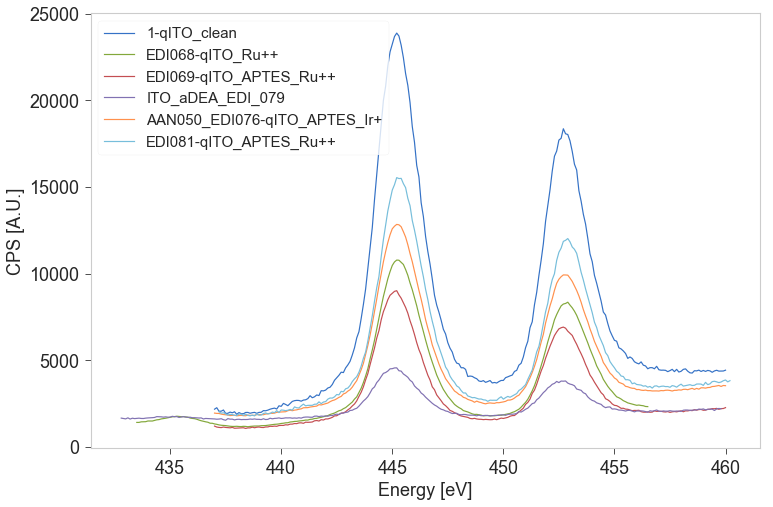

In [16]:
plt.figure(figsize=(12, 8))
for xp in experiments:
    shift = find_shift(xp, experiments[0], region='In3d')
    align_dfx(xp, shift, inplace=True)
    plot_region(xp, 'In3d')

## Shift all spectra to reference value for In 3d 5/2 444 eV

In [17]:
enmx = np.argmax(xp.dfx['In3d'].counts)
xp.dfx['In3d'].energy.loc[enmx] - 444

1.1999999999999886

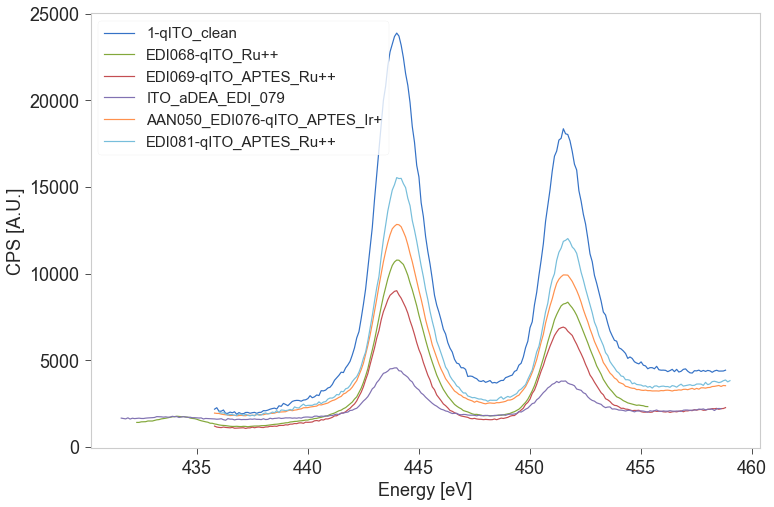

In [18]:
plt.figure(figsize=(12, 8))
for xp in experiments:
    shift = -1.2
    align_dfx(xp, shift, inplace=True)
    plot_region(xp, 'In3d')

# Plot raw spectra

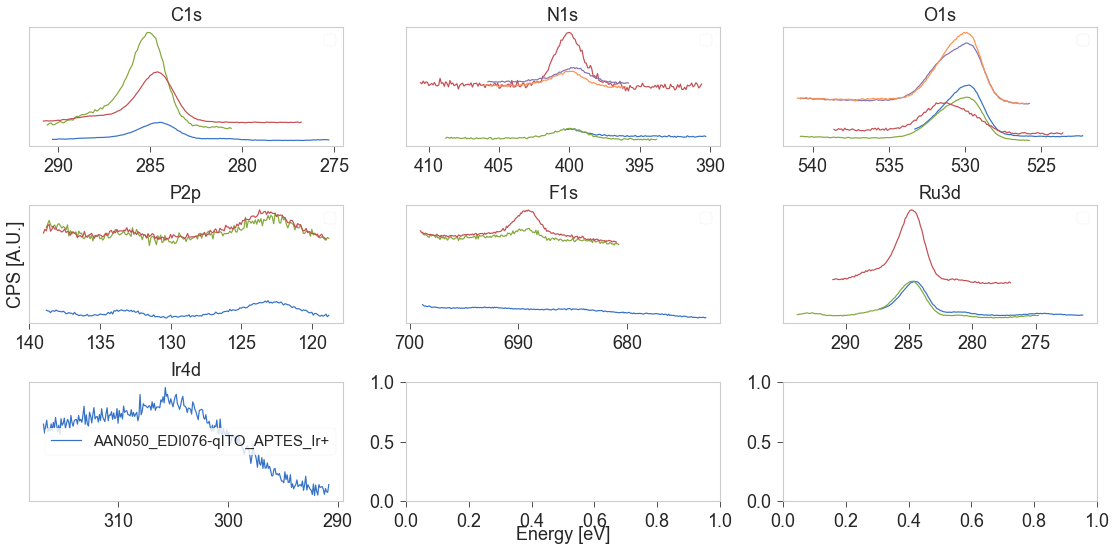

In [23]:
regions = ['C1s', 'N1s', 'O1s', 'P2p', 'F1s', 'Ru3d', 'Ir4d']
plot_xp_regions(experiments[1:], regions, ncols=3);

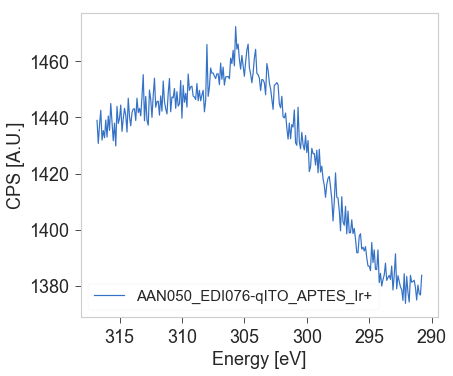

In [173]:
plot_region(experiments[4], 'Ir4d')


[(1060, 2300), (100, 40)]

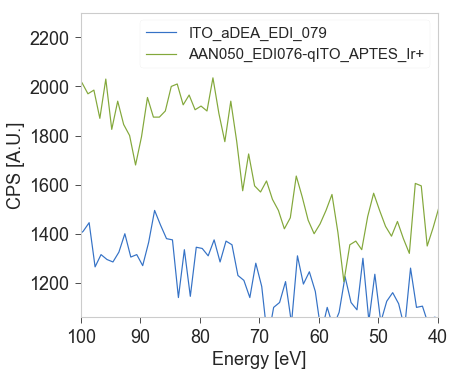

In [172]:
plot_region(experiments[4], 'Ir4d')
plot_region(experiments[3], 'overview')
plot_region(experiments[4], 'overview')
ax = plt.gca()
ax.set(xlim=(100, 40), ylim=(1060, 2300))

[(1060, 2300), (400, 250)]

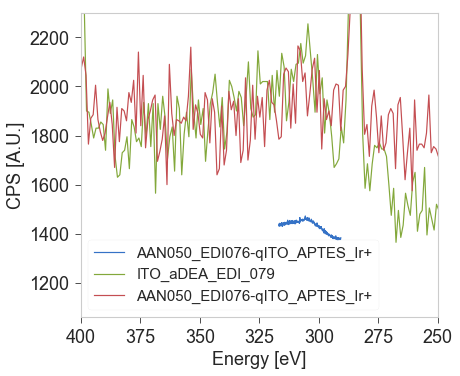

In [177]:
plot_region(experiments[4], 'Ir4d')
plot_region(experiments[3], 'overview')
plot_region(experiments[4], 'overview')
ax = plt.gca()
ax.set(xlim=(400, 250), ylim=(1060, 2300))

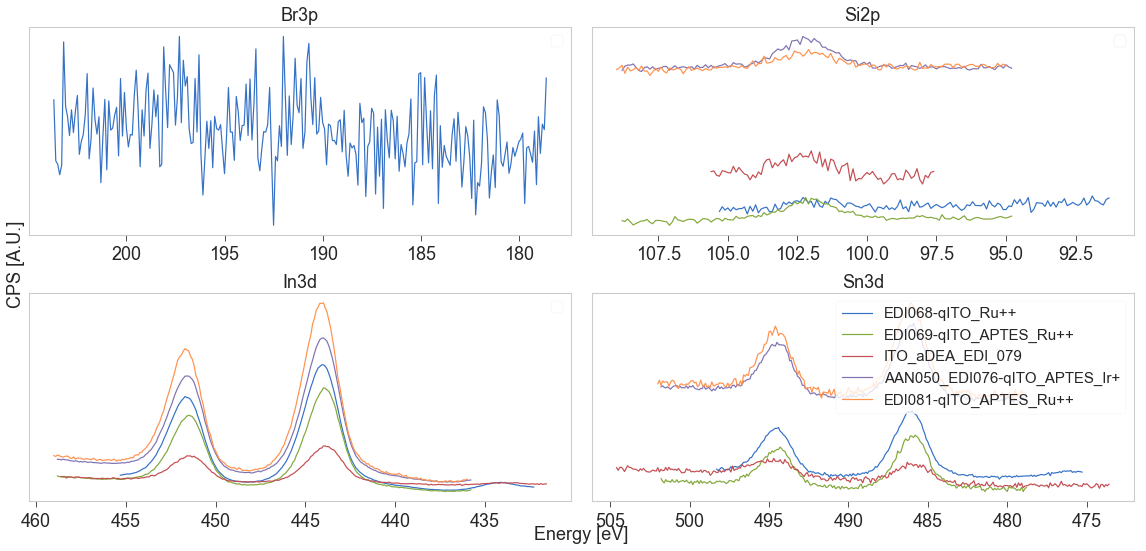

In [21]:
regions = ['Br3p', 'Si2p', 'In3d', 'Sn3d']
plot_xp_regions(experiments[1:], regions, ncols=2);

# BG subtraction

## Bulk subtract background

KeyError on  'Ru3p'
KeyError on  'Ru3d'
KeyError on  'P2p'
KeyError on  'F1s'
KeyError on  'Ir4d'
KeyError on  'Br3p'
Max iterations exceeded, subtract ALS baseline
KeyError on  'Ru3p'
KeyError on  'P2p'
KeyError on  'F1s'
KeyError on  'Ir4d'
KeyError on  'Br3p'
KeyError on  'C1s'
Max iterations exceeded, subtract ALS baseline
KeyError on  'Ir4d'
KeyError on  'Br3p'
KeyError on  'Ru3p'
KeyError on  'Ru3d'
KeyError on  'P2p'
KeyError on  'F1s'
KeyError on  'Ir4d'
KeyError on  'Ru3p'
KeyError on  'Ru3d'
KeyError on  'Br3p'
KeyError on  'C1s'
KeyError on  'Ru3p'
KeyError on  'Ir4d'
KeyError on  'Br3p'


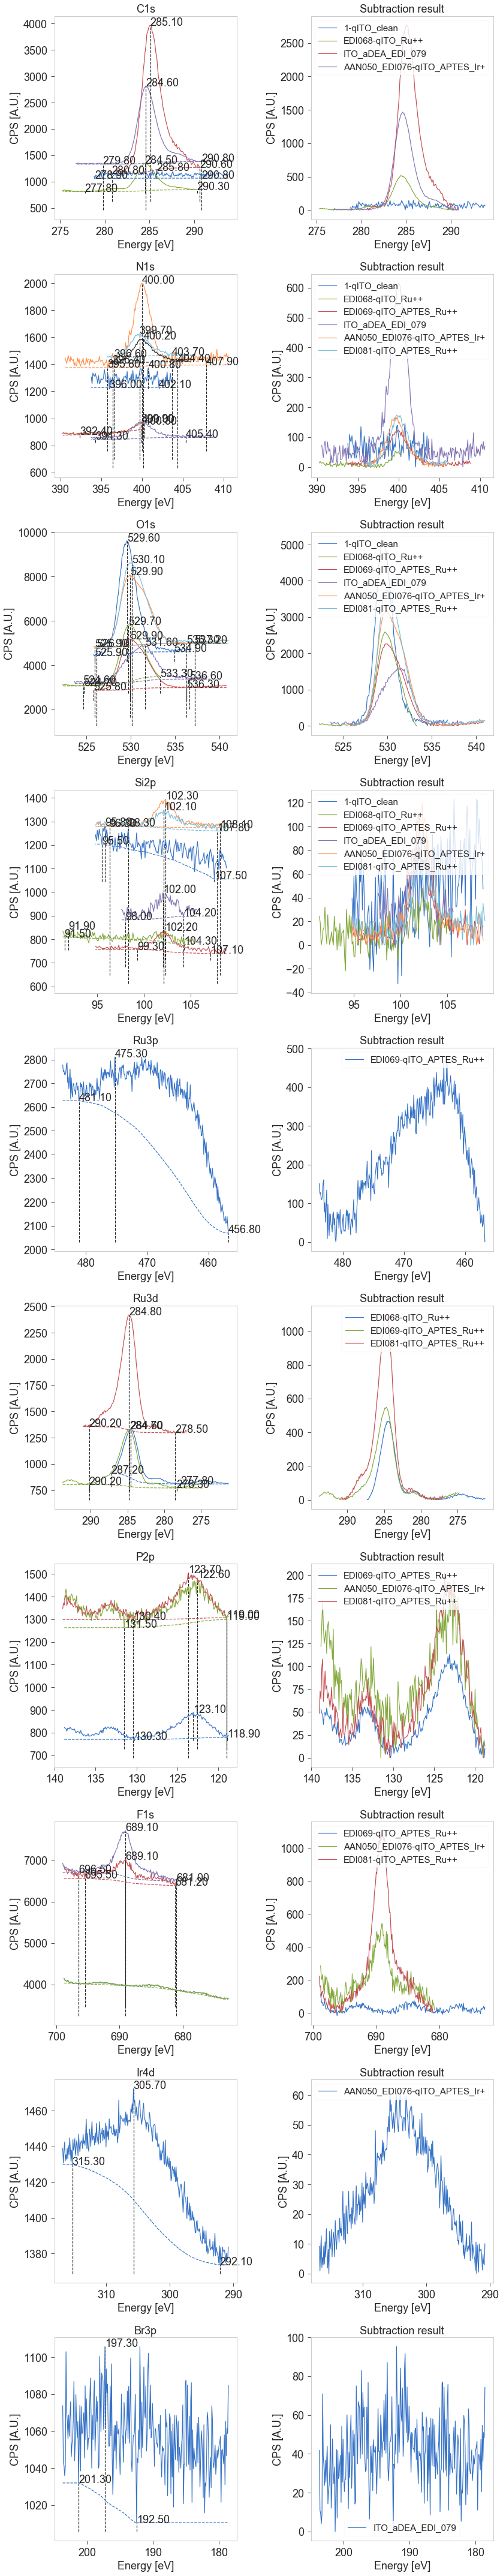

In [37]:
regions = ['C1s', 'N1s', 'O1s', 'Si2p', 'Ru3p', 'Ru3d', 'P2p', 'F1s', 'Ir4d', 'Br3p']
bg_exps = bulk_bg_subtract(experiments, regions)

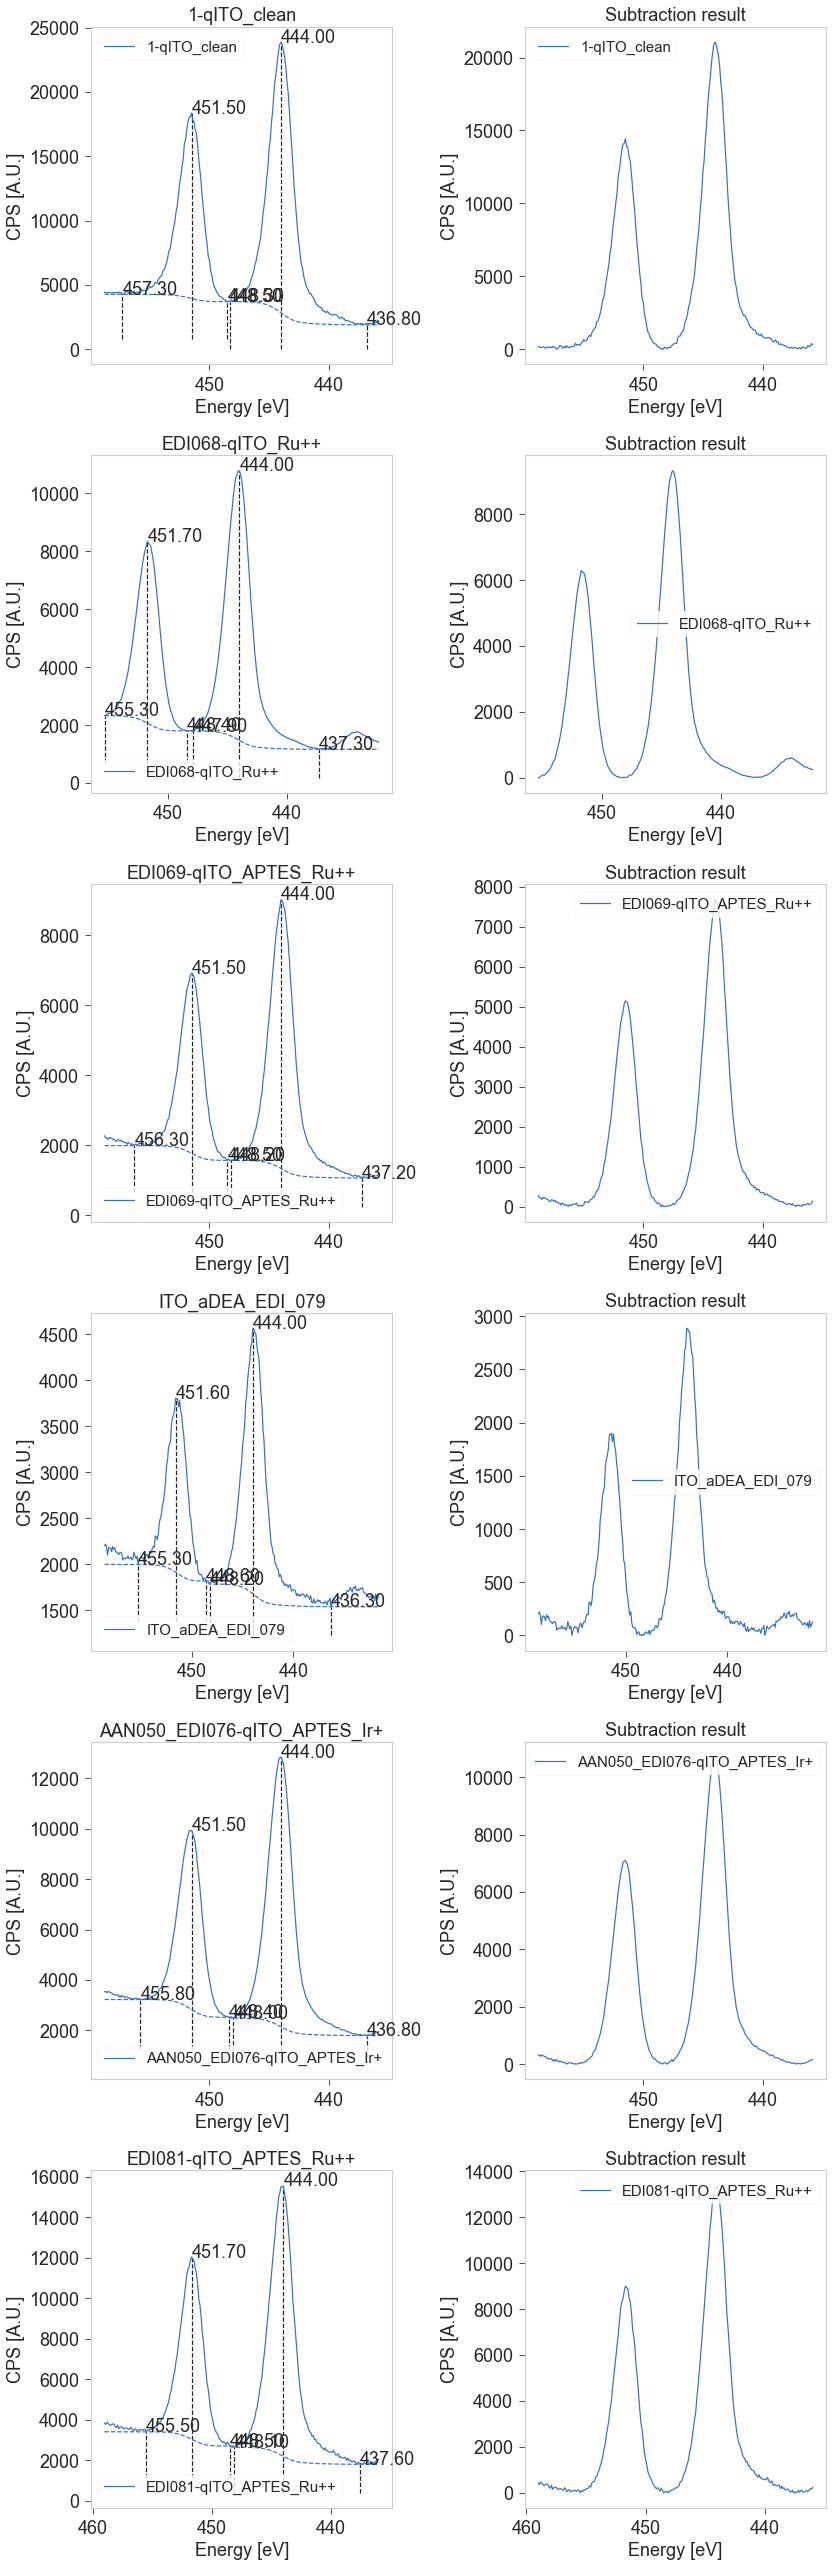

In [38]:
bg_exps = region_2bg_subtract(bg_exps, 'In3d', 448.40)

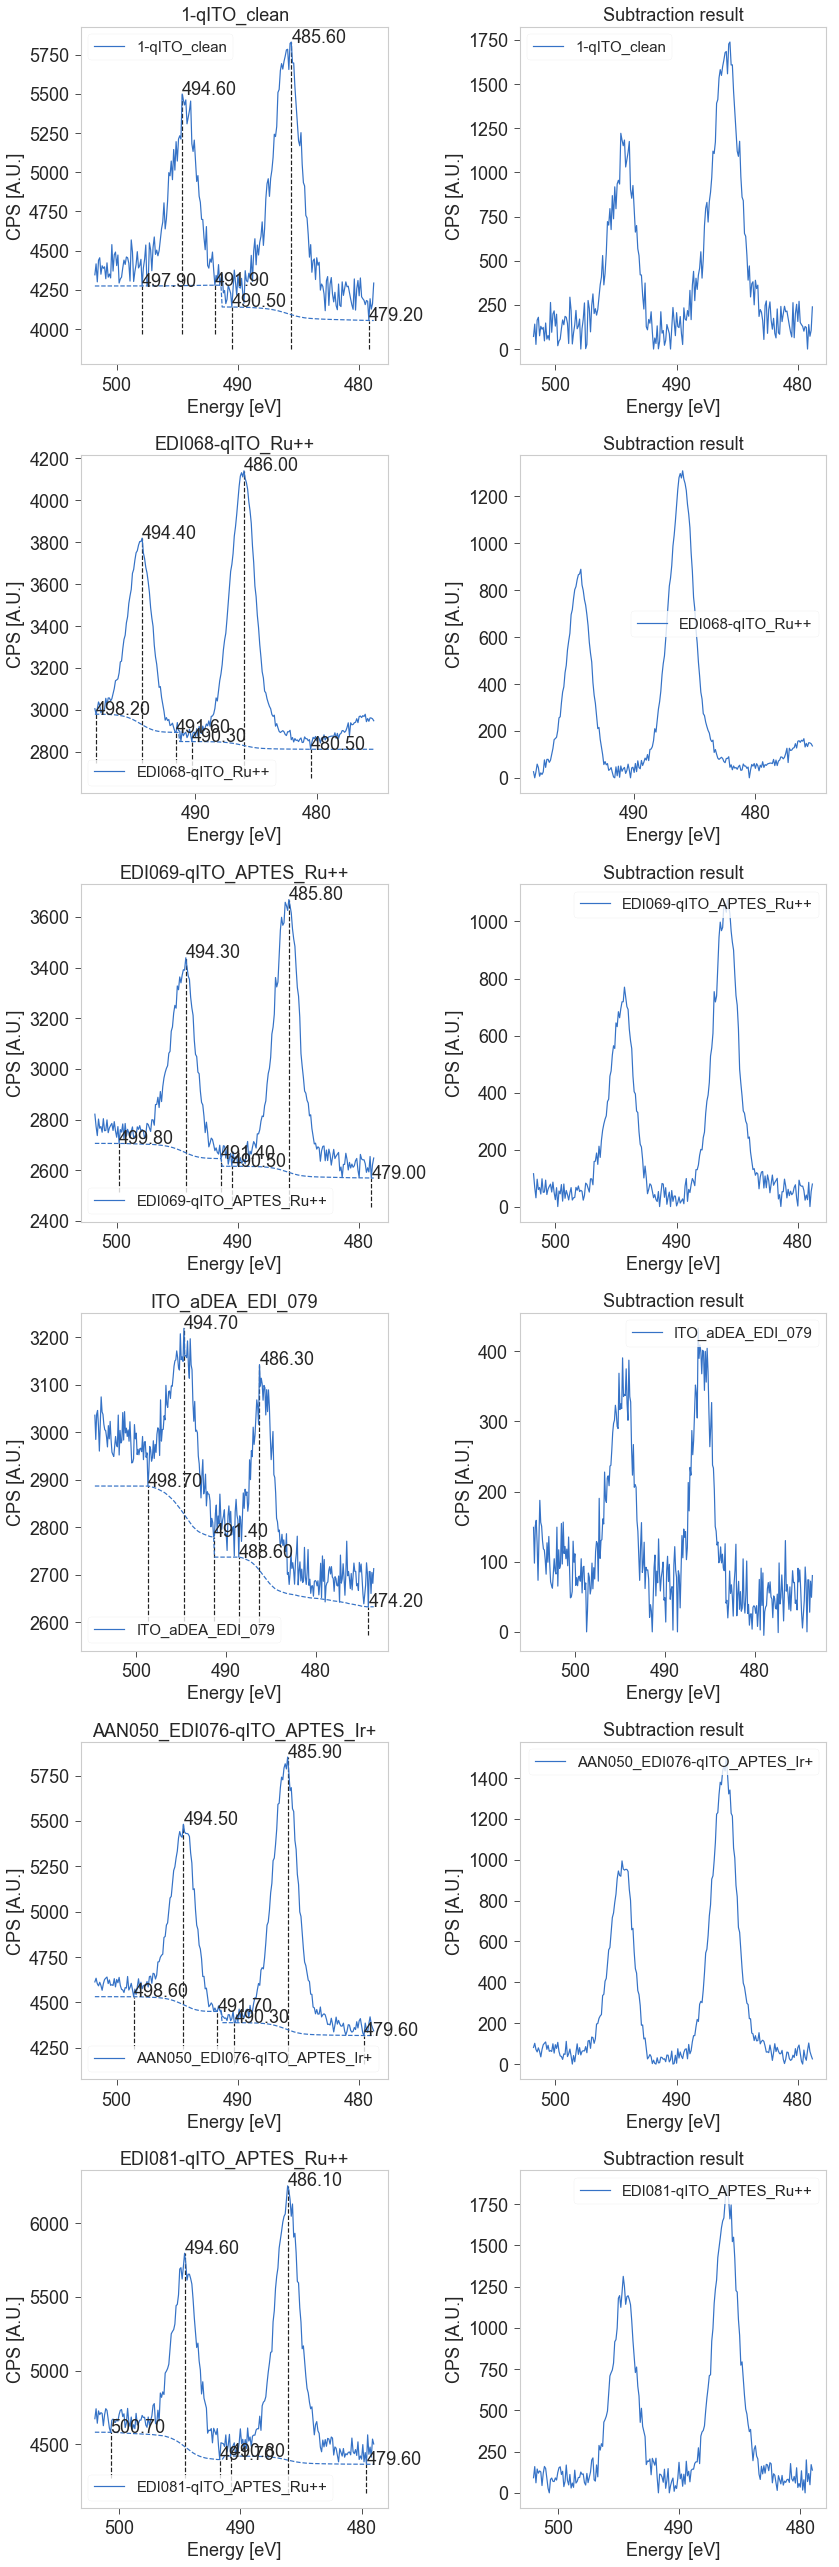

In [39]:
bg_exps = region_2bg_subtract(bg_exps, 'Sn3d', 491.40)

## Compress noisy N 1s 

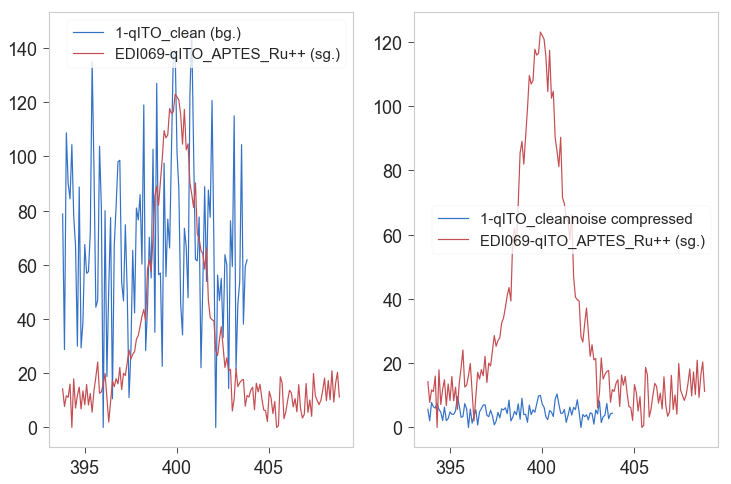

In [40]:
compress_noisy_region(xp=bg_exps[0], xpRef=bg_exps[2], region='N1s', inplace=True);

## Plot Bg subtraction

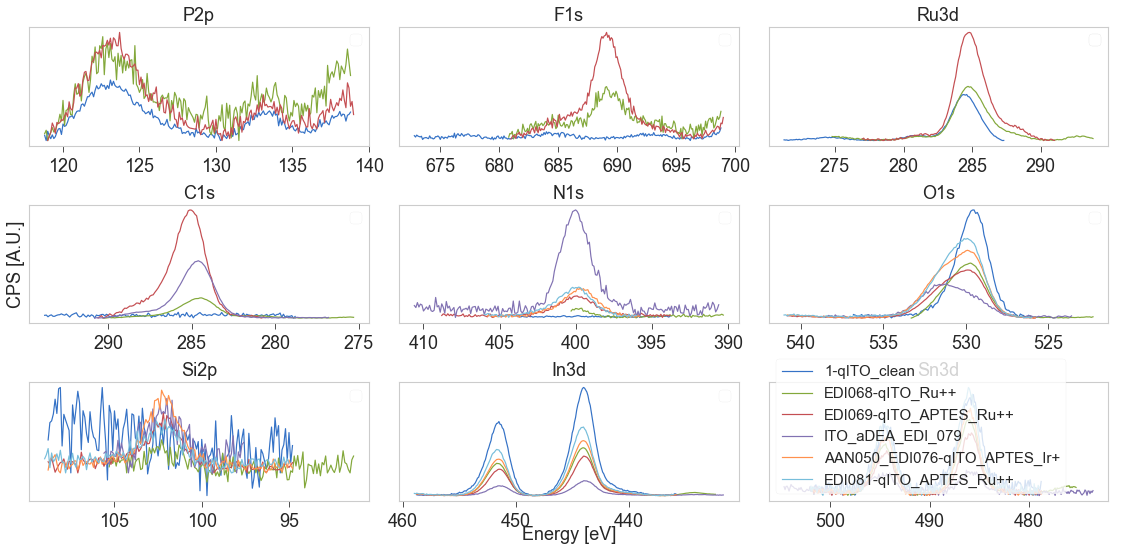

In [41]:
regions = [ 'P2p', 'F1s', 'Ru3d', 'C1s', 'N1s', 'O1s', 'Si2p', 'In3d', 'Sn3d']
plot_xp_regions(bg_exps, regions, ncols=3);

## Plot F1s

In [254]:
bg_exps[5].name = 'EDI081-qITO_AUTES_Ru++ [PF$_6]^-$'
bg_exps[5].color = 'm'

In [264]:
bg_exps[4].name= 'EDI076-AAN050-qITO-APTES_Ir+Cl$^-$'
bg_exps[4].color = 'y'

In [263]:
bg_exps[2].color = 'r'

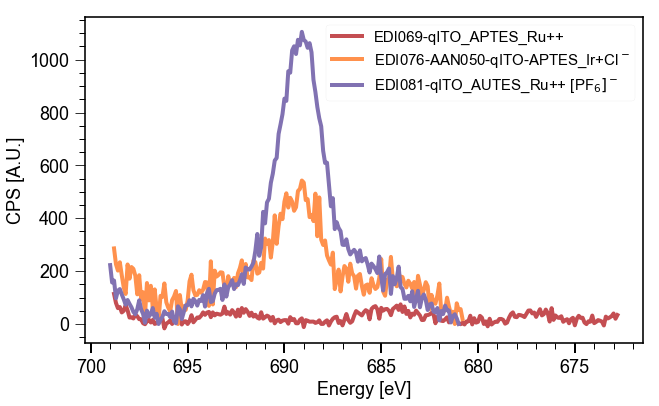

In [265]:
plt.figure(figsize=(10, 6))
region = 'F1s'
for xp in bg_exps:
    try:
        plot_region(xp, region)
    except KeyError:
        pass

# Scale to In 3d

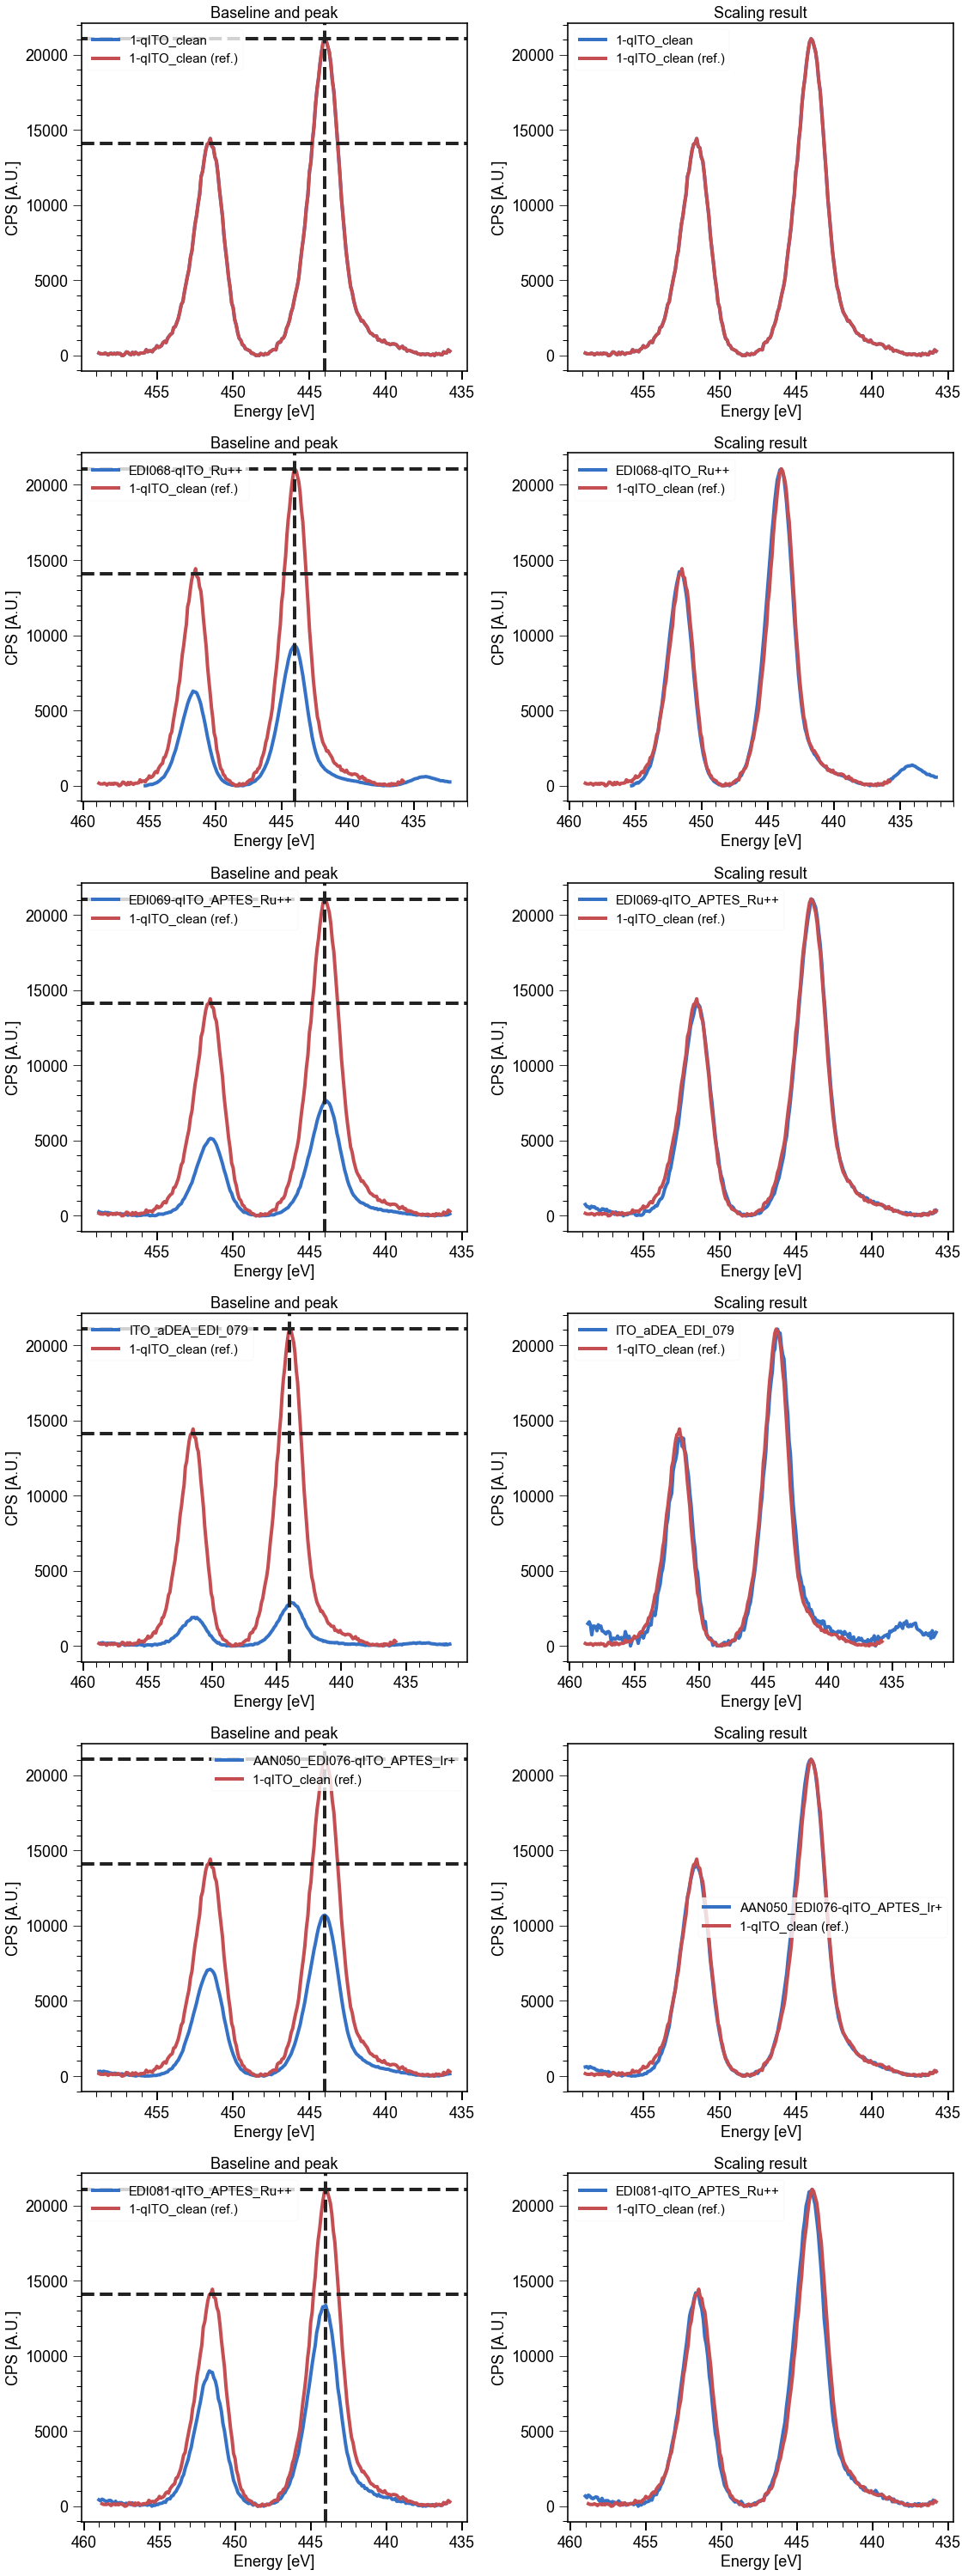

In [204]:
scaled_exps = scale_and_plot_spectra(bg_exps, indRef=0, region='In3d')

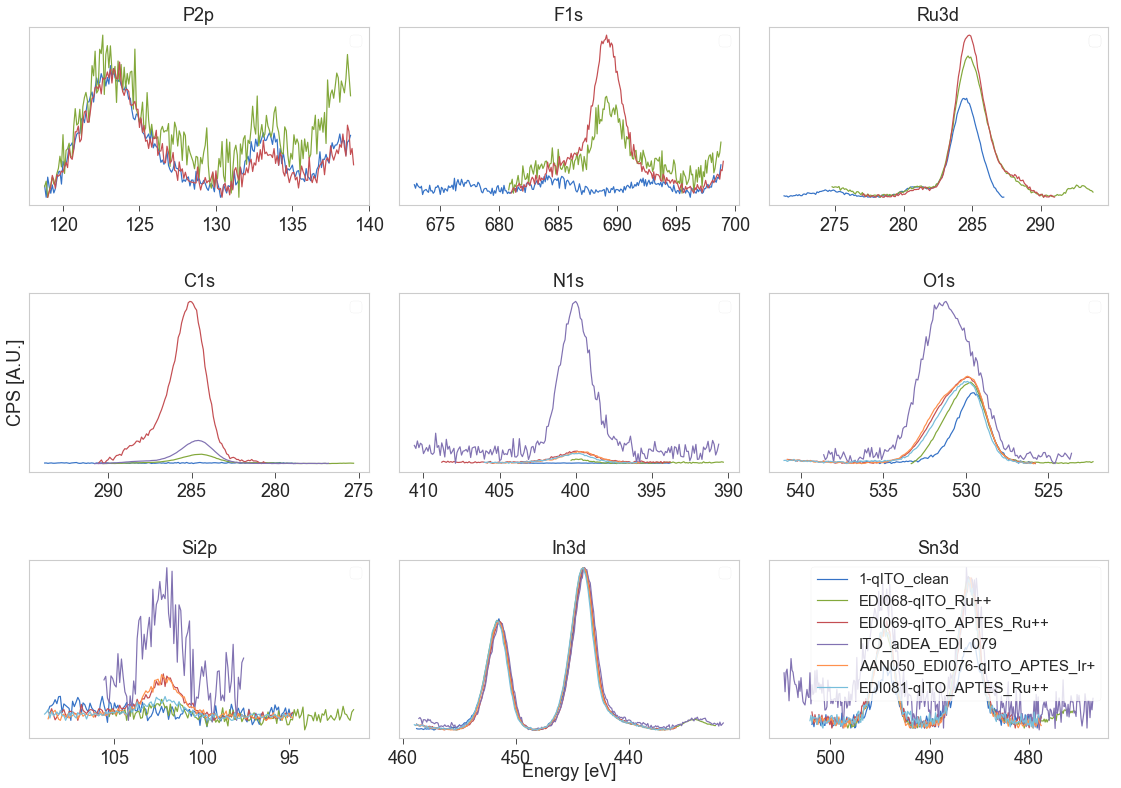

In [43]:
regions = ['P2p', 'F1s', 'Ru3d', 'C1s', 'N1s', 'O1s', 'Si2p', 'In3d', 'Sn3d']
plot_xp_regions(scaled_exps, regions, ncols=3);
plt.gcf().set_figheight(12)

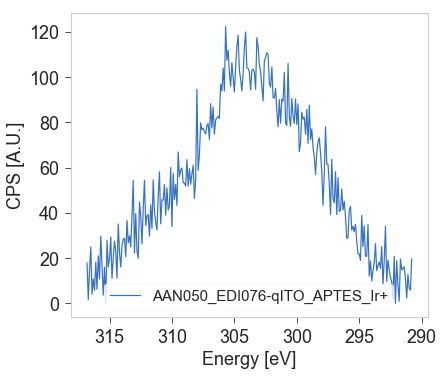

In [128]:
plot_region(scaled_exps[4], 'Ir4d')

# Crop and subtract O 1s clean

## Subtract ITO O 1s

In [44]:
def subtract_ref_region(xp : XPS_experiment, xpRef: XPS_experiment, region: str, inplace : bool = False):
    """Subtract the counts in a region in xpRef from xp, useful to account for clean substrate contributions"""

    df, dfRef = xp.dfx[region].dropna(), xpRef.dfx[region].dropna()
    y_sub = df.counts - dfRef.counts
    if inplace:
        xp.dfx[region] = pd.DataFrame([xp.dfx[region].energy, y_sub]).T
        return xp
    else:
        xpNew = deepcopy(xp)
        xpNew.dfx[region] = pd.DataFrame([xpNew.dfx[region].energy, y_sub]).T
        return xpNew

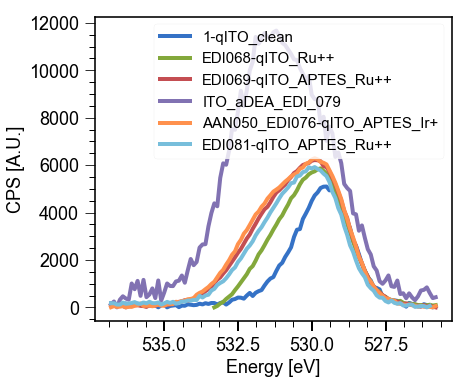

In [205]:
region = 'O1s'
for xp in scaled_exps:
    trim_spectra(xp, scaled_exps[0], region, inplace=True)
    plot_region(xp, region)
plt.gca().invert_xaxis()

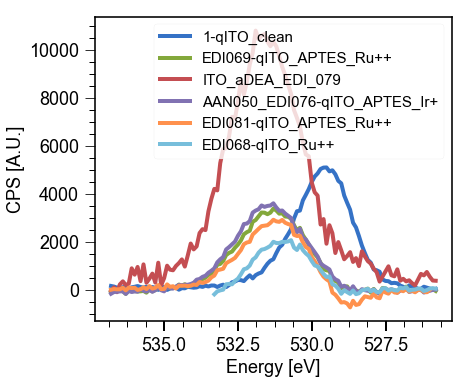

In [206]:
region = 'O1s'
plot_region(scaled_exps[0], region)
for i,xp in enumerate(scaled_exps[2:]):
    subtract_ref_region(xp, scaled_exps[0], 'O1s', inplace=True)
    plot_region(xp, region)
    
xp0 = trim_spectra(scaled_exps[0], scaled_exps[1], region)    
subtract_ref_region(scaled_exps[1], xp0, 'O1s', inplace=True)
plot_region(scaled_exps[1], region)

plt.gca().invert_xaxis()

In [209]:
[xp.name for xp in scaled_exps]
names = ['1-qITO_clean', 'EDI068-qITO_Ru++', 'EDI069-qITO_APTES_Ru++', 'EDI079-qITO_APTES_decFBI-acid',
 'EDI076-AAN050-qITO_APTES_Ir+', 'EDI081-qITO_AUTES_Ru++']
for xp, n in zip(scaled_exps, names):
    xp.name = n

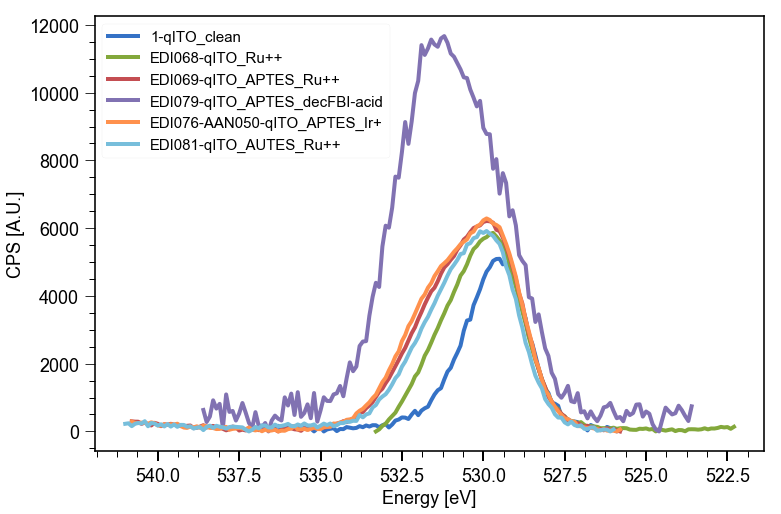

In [201]:
plt.figure(figsize=(12, 8))
region = 'O1s'
for i,xp in enumerate(scaled_exps):
    plot_region(xp, region)

plt.gca().invert_xaxis()

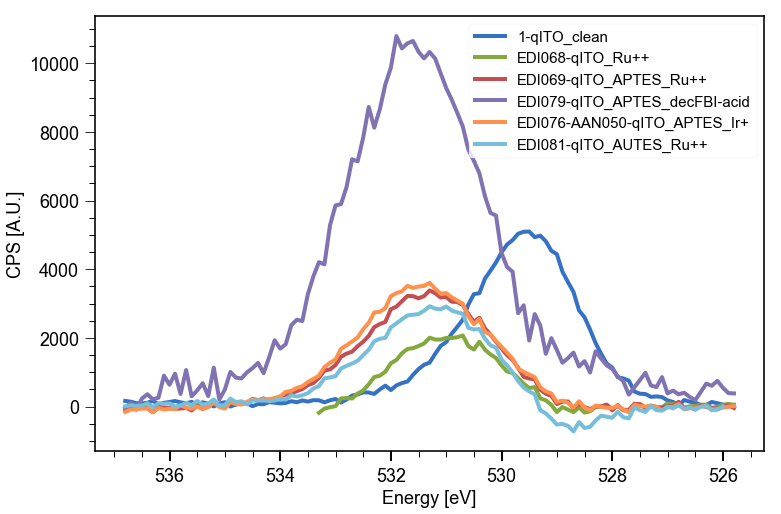

In [210]:
plt.figure(figsize=(12, 8))
region = 'O1s'
for i,xp in enumerate(scaled_exps):
    plot_region(xp, region)

plt.gca().invert_xaxis()

## Crop F 1s, P 2p

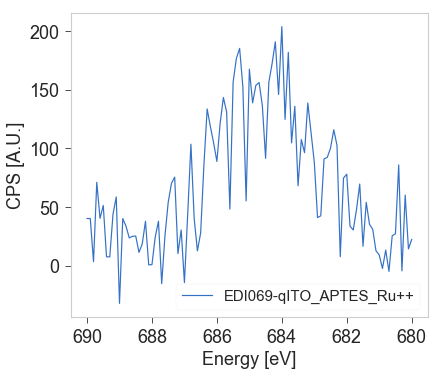

In [74]:
xpc = crop_spectrum(scaled_exps[2], 'F1s', eup=690, edw=680, inplace=True)
plot_region(xpc, 'F1s')

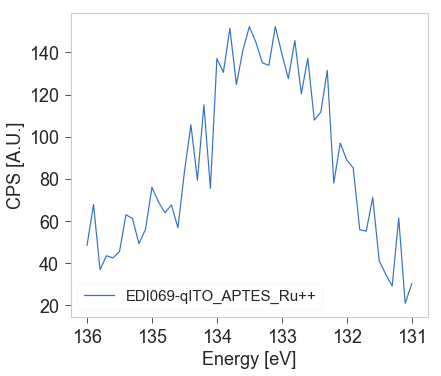

In [75]:
xpc = crop_spectrum(scaled_exps[2], 'P2p', eup=136, edw=131, inplace=True)
plot_region(xpc, 'P2p')

## Fit N 1s

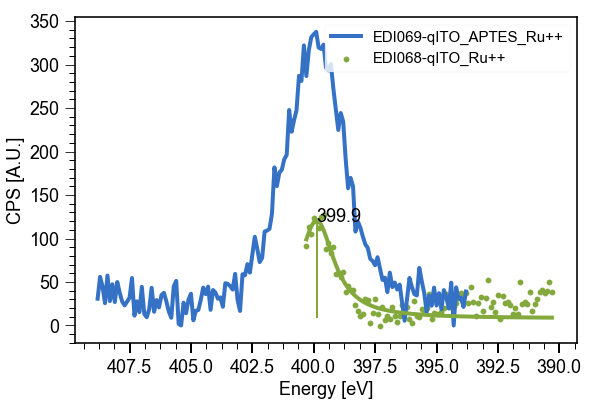

In [272]:
plt.figure(figsize=(9,6))
region = 'N1s'
plot_region(scaled_exps[2], region)
Fn = XPFit(scaled_exps[1], 'N1s')
scaled_exps[1].color = 'g'
Fn.voigt()
plot_fit_result(scaled_exps[1], region)
plt.gca().legend()
plt.gca().invert_xaxis()

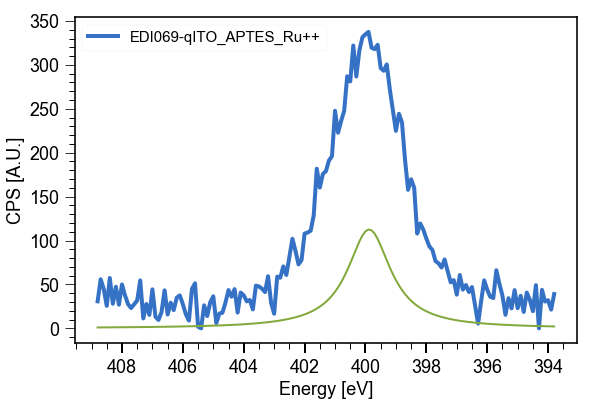

In [273]:
plt.figure(figsize=(9,6))
plot_region(scaled_exps[2], region)
fitRes = scaled_exps[1].fit[region]
x = scaled_exps[2].dfx[region].energy.dropna()
comps = fitRes.eval_components(x=x)
plt.plot(x, comps['v1_'], lw=2, label=scaled_exps[1].name)[0]


In [274]:
area_n = np.trapz(comps['v1_'], dx=x[0]-x[1], )
print('Raw area: ', area_n)
asf = dict({'C1s' : 0.296, 'O1s' : 0.711, 'N1s' : 0.477, 'Ba3d' : 7.49,
            'Br3p' : 1.054, 'Br3d' : 1.054,
           'In3d' : 4.359, 'Sn3d' : 4.725, 'Cl2p' : 0.891, 'Si2p': 0.339})

area_n /= asf['N1s']
print('Weighted area: ', area_n)
scaled_exps[1].area = {}
scaled_exps[1].area['N1s'] = area_n

Raw area:  281.10148974563083
Weighted area:  589.3112992570877


[(396, 404)]

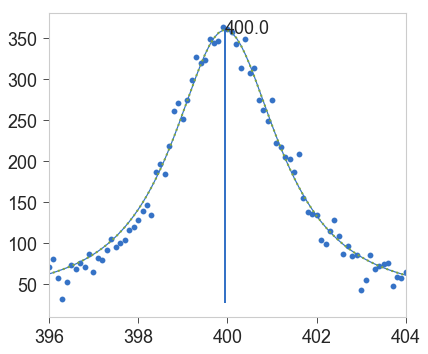

In [79]:
region = 'N1s'
Fn = XPFit(scaled_exps[2], 'N1s')

Fn.voigt()
plot_fit_result(scaled_exps[2], region)
plt.gca().set(xlim=(396, 404))


Modify user pars


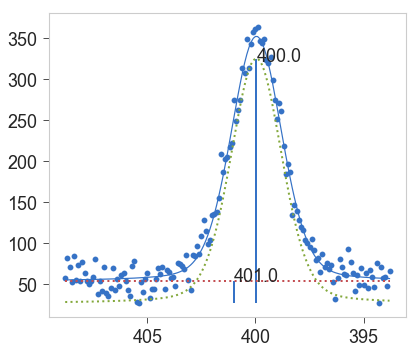

In [80]:
region = 'N1s'
Fn = XPFit(scaled_exps[2], 'N1s')
# Fn.preset_pars('v1_amplitude', scaled_exps[2].fit[region].best_values['v1_amplitude']/2)
# Fn.preset_pars('v1_sigma', scaled_exps[2].fit[region].best_values['v1_sigma']/2)
# Fn.preset_pars('v2_sigma', scaled_exps[2].fit[region].best_values['v2_sigma']/2)
# Fn.preset_pars('v2_amplitude', scaled_exps[2].fit[region].best_values['v2_amplitude']/2)
Fn.preset_pars('v1_fraction', 0.3)
Fn.preset_pars('v2_fraction', 0.3)
Fn.preset_pars('v2_center', 401)

Fn.double_voigt(sepPt=400.0)
Fn.plot()


In [81]:
scaled_exps[2].fit['N1s']

## Fit Ru 3d

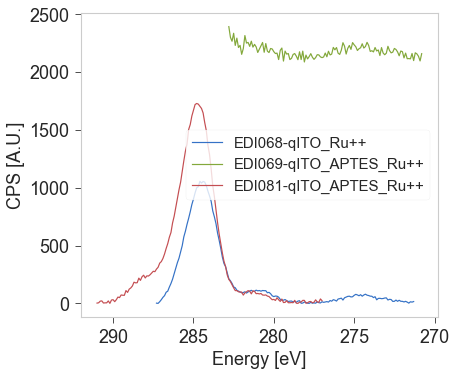

In [91]:
for xp in scaled_exps:
    try:
        plot_region(xp, 'Ru3d')
    except KeyError as e:
        pass

In [226]:
df = scaled_exps[2].dfx
d = dict(zip(df.columns.levels[0], ['F1s', 'F1s_bg', 'In3d', 'In3d_bg', 'N1s', 'N1s_bg', 'O1s', 'O1s_bg',
       'P2p', 'P2p_bg', 'P2s', 'C1s', 'Ru3d', 'Ru3d_bg', 'Ru3p', 'Ru3p_bg',
       'Si2p', 'Si2p_bg', 'Sn3d', 'Sn3d_bg', 'overview']))
df = df.rename(columns=d, level=0)
df.columns
scaled_exps[2].dfx = df

In [230]:
scaled_exps[2].color = 'b'
scaled_exps[5].color = 'r'

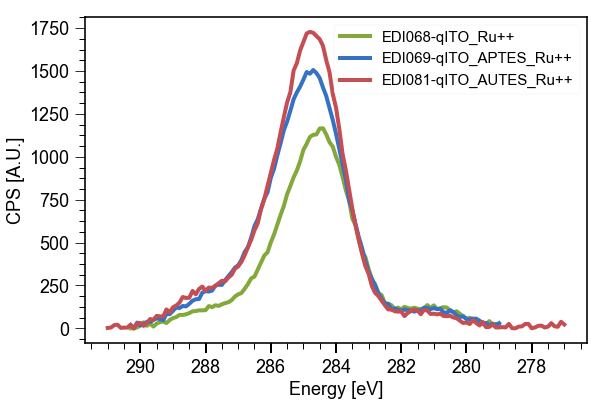

In [267]:
# plot_region(scaled_exps[1], 'Ru3d')
region = 'C1s'
plt.figure(figsize=(9,6))

crop_spectrum(scaled_exps[1], region, edw=279, inplace=True)
trim_spectra(scaled_exps[2], scaled_exps[1], region, inplace=True)
plot_region(scaled_exps[1], 'C1s')

plot_region(scaled_exps[2], 'C1s')
plot_region(scaled_exps[5], 'Ru3d')

# plt.gca().invert_xaxis()

Best chi2 value for 3 components


[1125.3192448057257, 507.57382466342057, 155.42769918954275]

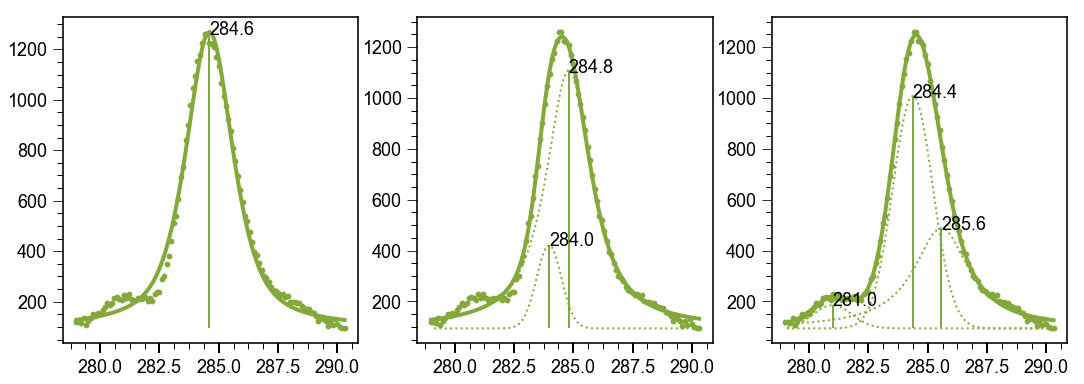

In [233]:
fit_n_voigt(scaled_exps[1], region, max_comps=3, flag_save=True)

Best chi2 value for 3 components


[2381.408718801031, 482.16306395463465, 142.54991661447824]

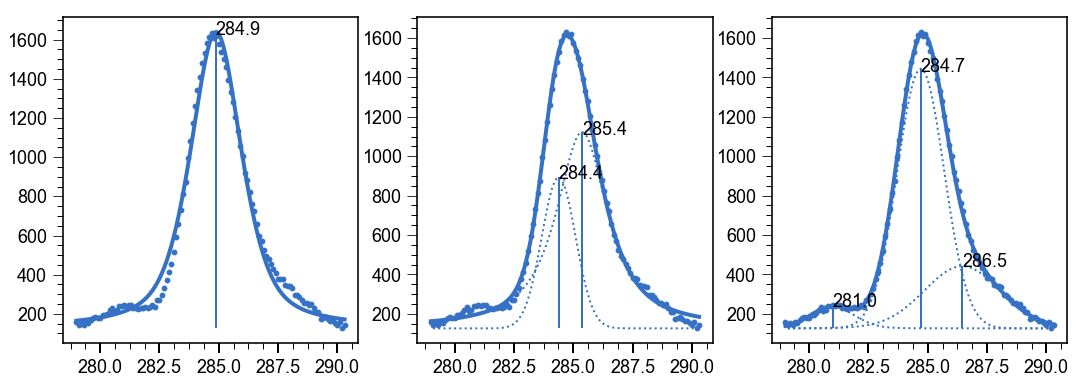

In [234]:
fit_n_voigt(scaled_exps[2], region, max_comps=3, flag_save=True)

Best chi2 value for 3 components


[3402.7808993320996, 628.6304083645823, 305.6063161294163]

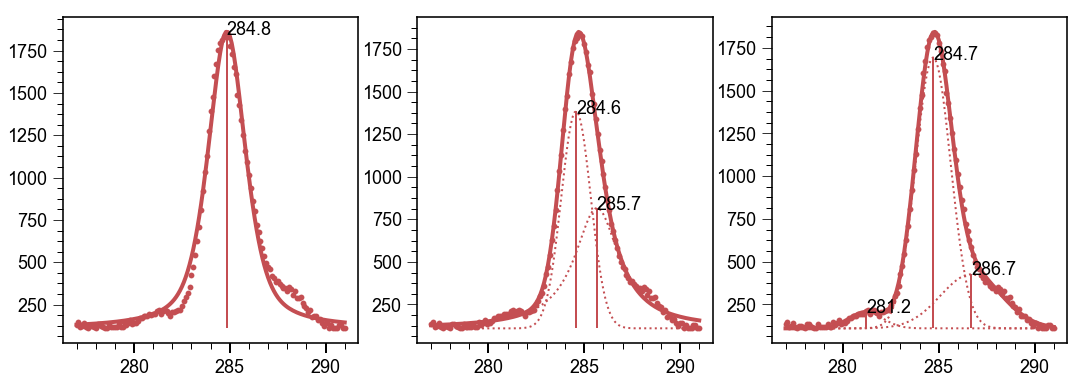

In [235]:
fit_n_voigt(scaled_exps[5], 'Ru3d', max_comps=3, flag_save=True)

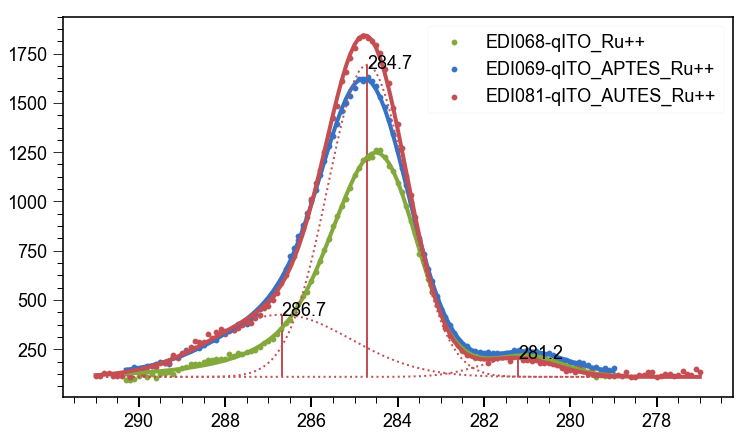

In [241]:
plt.figure(figsize=(12,7))

plot_fit_result(scaled_exps[1], 'C1s', fitRes=scaled_exps[1].fit['C1s_3comps'], plot_comps=False)

plot_fit_result(scaled_exps[2], 'C1s', fitRes=scaled_exps[2].fit['C1s_3comps'], plot_comps=False)
plot_fit_result(scaled_exps[5], 'Ru3d', fitRes=scaled_exps[5].fit['Ru3d_3comps'], plot_comps=True)
plt.legend(fontsize=18)
# plt.gca().invert_xaxis()

In [278]:
asf = dict({'C1s' : 0.296, 'O1s' : 0.711, 'N1s' : 0.477, 'Ba3d' : 7.49,
            'Br3p' : 1.054, 'Br3d' : 1.054, 'Ru3d': 4.273,
           'In3d' : 4.359, 'Sn3d' : 4.725, 'Cl2p' : 0.891, 'Si2p': 0.339})

In [99]:
scaled_exps[2].fit.pop('C1s_1comps')
scaled_exps[2].fit.pop('C1s_2comps');

In [100]:
scaled_exps[1].fit.pop('C1s_1comps')
scaled_exps[1].fit.pop('C1s_2comps');

Raw area:  183.30325803206588
Weighted area:  71.49670724396047


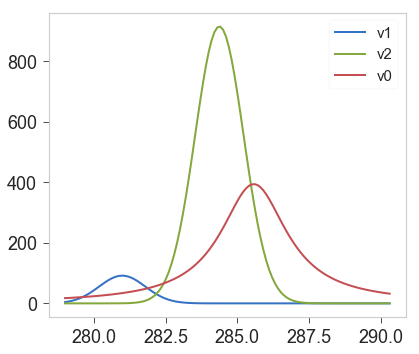

In [120]:
fitRes = scaled_exps[1].fit[region+'_3comps']
x = scaled_exps[1].dfx[region].energy.dropna()
comps = fitRes.eval_components(x=x)
plt.plot(x, comps['v1_'], lw=2, label='v1')[0]
plt.plot(x, comps['v2_'], lw=2, label='v2')[0]
plt.plot(x, comps['v0_'], lw=2, label='v0')[0]
plt.legend()


area_ru = np.trapz(comps['v1_'], dx=x[0]-x[1], )
## This is only the Ru 3d 5/2 peak, need to add the 3/2
area_c = np.trapz(comps['v2_'], dx=x[0]-x[1], ) + np.trapz(comps['v0_'], dx=x[0]-x[1], )

print('Raw area: ', area_ru)

area_exc = area_ru*2/3   ## Excess contribution to C1s from Ru 3d 3/2
area_ru /= asf['Ru3d']
area_ru *= (1 + 2/3)  ## Account for the 3/2 peak

area_c -= area_exc
area_c /= asf['C1s']

print('Weighted area: ', area_ru)
scaled_exps[1].area['Ru3d'] = area_ru
scaled_exps[1].area['C1s'] = area_c

Raw area:  252.42262058094695
Weighted area:  98.45643988647592


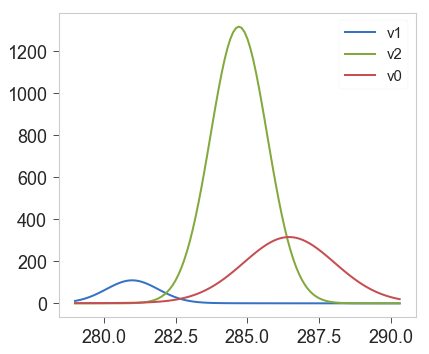

In [121]:
fitRes = scaled_exps[2].fit[region+'_3comps']
x = scaled_exps[2].dfx[region].energy.dropna()
comps = fitRes.eval_components(x=x)
plt.plot(x, comps['v1_'], lw=2, label='v1')[0]
plt.plot(x, comps['v2_'], lw=2, label='v2')[0]
plt.plot(x, comps['v0_'], lw=2, label='v0')[0]
plt.legend()


area_ru = np.trapz(comps['v1_'], dx=x[0]-x[1], )
area_c = np.trapz(comps['v2_'], dx=x[0]-x[1], ) + np.trapz(comps['v0_'], dx=x[0]-x[1], )

print('Raw area: ', area_ru)

area_exc = area_ru*2/3   ## Excess contribution to C1s from Ru 3d 3/2
area_ru /= asf['Ru3d']
area_ru *= (1 + 2/3) 

area_c -= area_exc
area_c /= asf['C1s']

print('Weighted area: ', area_ru)
scaled_exps[2].area = {}
scaled_exps[2].area['Ru3d'] = area_ru
scaled_exps[2].area['C1s'] = area_c

In [97]:
scaled_exps[5].fit.pop('Ru3d_1comps')
scaled_exps[5].fit.pop('Ru3d_2comps');

Raw area:  210.29615258528477
Weighted area:  82.02517847932162


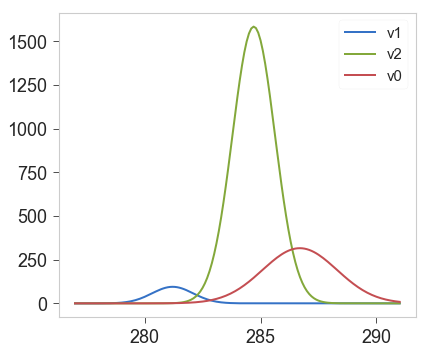

In [122]:
region = 'Ru3d'
fitRes = scaled_exps[5].fit[region+'_3comps']
x = scaled_exps[5].dfx[region].energy.dropna()
comps = fitRes.eval_components(x=x)
plt.plot(x, comps['v1_'], lw=2, label='v1')[0]
plt.plot(x, comps['v2_'], lw=2, label='v2')[0]
plt.plot(x, comps['v0_'], lw=2, label='v0')[0]
plt.legend()

area_ru = np.trapz(comps['v1_'], dx=x[0]-x[1], )
## This is only the Ru 3d 5/2 peak, need to add the 3/2
area_c = np.trapz(comps['v2_'], dx=x[0]-x[1], ) + np.trapz(comps['v0_'], dx=x[0]-x[1], )

print('Raw area: ', area_ru)
area_exc = area_ru*2/3   ## Excess contribution to C1s from Ru 3d 3/2
area_ru /= asf['Ru3d']
area_ru *= (1 + 2/3)  ## Account for the 3/2 peak

area_c -= area_exc
area_c /= asf['C1s']

print('Weighted area: ', area_ru)
scaled_exps[5].area = {}
scaled_exps[5].area['Ru3d'] = area_ru
scaled_exps[5].area['C1s'] = area_c

In [125]:
scaled_exps[5].area

{'Ru3d': 82.02517847932162, 'C1s': 16136.458421449372}

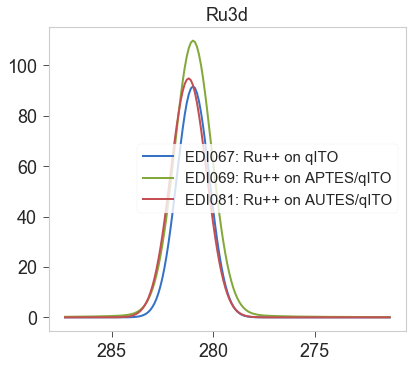

In [129]:
fitResRu = scaled_exps[1].fit['C1s_3comps']
fitResAptesRu = scaled_exps[2].fit['C1s_3comps']
fitResAptesRu2 = scaled_exps[5].fit['Ru3d_3comps']

x = scaled_exps[1].dfx[region].energy.dropna()
comps = fitResRu.eval_components(x=x)
compsAptes = fitResAptesRu.eval_components(x=x)
compsAptes2 = fitResAptesRu2.eval_components(x=x)

plt.plot(x, comps['v1_'], lw=2, label='EDI067: Ru++ on qITO')
plt.plot(x, compsAptes['v1_'], lw=2, label='EDI069: Ru++ on APTES/qITO')
plt.plot(x, compsAptes2['v1_'], lw=2, label='EDI081: Ru++ on AUTES/qITO')
plt.title('Ru3d')
plt.legend()
plt.gca().invert_xaxis()


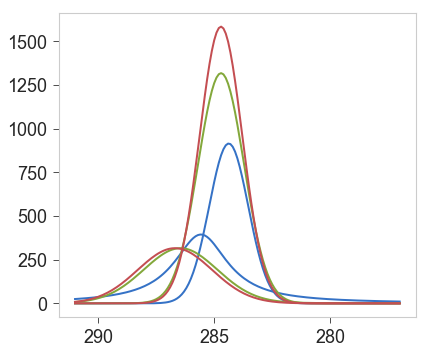

In [136]:
fitResRu = scaled_exps[1].fit['C1s_3comps']
fitResAptesRu = scaled_exps[2].fit['C1s_3comps']
fitResAutesRu = scaled_exps[5].fit['Ru3d_3comps']

x = scaled_exps[5].dfx[region].energy.dropna()
comps = fitResRu.eval_components(x=x)
compsAptes = fitResAptesRu.eval_components(x=x)
compsAutes = fitResAutesRu.eval_components(x=x)

plt.plot(x, comps['v2_'], '-b', lw=2, label='EDI067: Ru++ on qITO')
plt.plot(x, comps['v0_'], '-b', lw=2, label='EDI067: Ru++ on qITO')
plt.plot(x, compsAptes['v2_'], '-g', lw=2, label='EDI069: Ru++ on APTES/qITO')
plt.plot(x, compsAptes['v0_'], '-g', lw=2, label='EDI069: Ru++ on APTES/qITO')
plt.plot(x, compsAutes['v2_'], '-r', lw=2, label='EDI081: Ru++ on AUTES/qITO')
plt.plot(x, compsAutes['v0_'], '-r', lw=2, label='EDI081: Ru++ on AUTES/qITO')

# plt.legend()
plt.gca().invert_xaxis()


In [269]:
scaled_exps[2].area['C1s'] / scaled_exps[5].area['C1s']

TypeError: 'NoneType' object is not subscriptable

### Components in C 1s

In [283]:
region = 'C1s'
scaled_exps[2].area = {}

Raw area:  183.30325803206588
Weighted area:  71.49670724396047
Area CC/CN =  1.3225821174733698


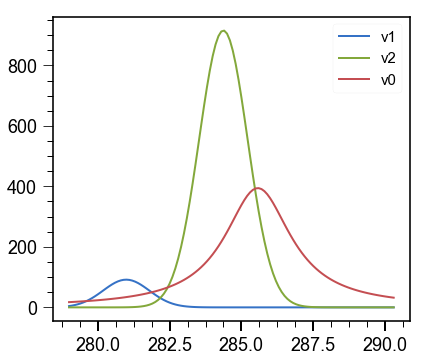

In [285]:
fitRes = scaled_exps[1].fit[region+'_3comps']
x = scaled_exps[1].dfx[region].energy.dropna()
comps = fitRes.eval_components(x=x)
plt.plot(x, comps['v1_'], lw=2, label='v1')[0]
plt.plot(x, comps['v2_'], lw=2, label='v2')[0]
plt.plot(x, comps['v0_'], lw=2, label='v0')[0]
plt.legend()


area_ru = np.trapz(comps['v1_'], dx=x[0]-x[1], )
## This is only the Ru 3d 5/2 peak, need to add the 3/2
area_cc =  np.trapz(comps['v2_'], dx=x[0]-x[1], )
area_cn = np.trapz(comps['v0_'], dx=x[0]-x[1], ) 
area_c = area_cc + area_cn
print('Raw area: ', area_ru)

area_exc = area_ru*2/3   ## Excess contribution to C1s from Ru 3d 3/2
area_ru /= asf['Ru3d']
area_ru *= (1 + 2/3)  ## Account for the 3/2 peak

area_c -= area_exc
area_c /= asf['C1s']

print('Weighted area: ', area_ru)
scaled_exps[1].area['Ru3d'] = area_ru
scaled_exps[1].area['C1s'] = area_c
print('Area CC/CN = ', area_cc/area_cn)

Raw area:  252.42262058094695
Weighted area:  98.45643988647592
Area CC/CN =  2.5732642684825557


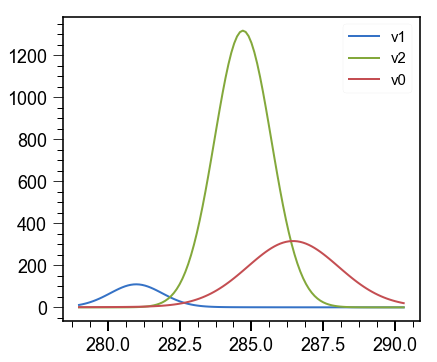

In [286]:
fitRes = scaled_exps[2].fit[region+'_3comps']
x = scaled_exps[2].dfx[region].energy.dropna()
comps = fitRes.eval_components(x=x)
plt.plot(x, comps['v1_'], lw=2, label='v1')[0]
plt.plot(x, comps['v2_'], lw=2, label='v2')[0]
plt.plot(x, comps['v0_'], lw=2, label='v0')[0]
plt.legend()


area_ru = np.trapz(comps['v1_'], dx=x[0]-x[1], )
## This is only the Ru 3d 5/2 peak, need to add the 3/2
area_cc =  np.trapz(comps['v2_'], dx=x[0]-x[1], )
area_cn = np.trapz(comps['v0_'], dx=x[0]-x[1], ) 
area_c = area_cc + area_cn
print('Raw area: ', area_ru)

area_exc = area_ru*2/3   ## Excess contribution to C1s from Ru 3d 3/2
area_ru /= asf['Ru3d']
area_ru *= (1 + 2/3)  ## Account for the 3/2 peak

area_c -= area_exc
area_c /= asf['C1s']

print('Weighted area: ', area_ru)
scaled_exps[2].area['Ru3d'] = area_ru
scaled_exps[2].area['C1s'] = area_c
print('Area CC/CN = ', area_cc/area_cn)

In [288]:
cn_ru = 5
cc_ru = 3*6 + 2

cn_ru_aptes = 5 + 2
cc_ru_aptes = 3*6+2 + 2*2

cc_ru / cn_ru, cc_ru_aptes / cn_ru_aptes

(4.0, 3.4285714285714284)

# Store processed experiments

In [112]:
def store_fits(xp: XPS_experiment, path: str = None):
    """Store fits of a XPS_experiment in separate file"""
    if path == None:
        path = xp.path + '.ft'
    else:
        path += '.ft'
    with open(path, 'w') as fout:
        for k in xp.fit.keys():
            fout.write('XPFit %s:\n\n' %k)
            dump_region = xp.fit[k].dumps()
            fout.write(dump_region + '\n\n')
    print('Storing of file %s successful' %path)
    
def write_processed_xp(filepath : str, xp : XPS_experiment):
    """Save processed XPS experiment to file"""
    import csv;
    with open(filepath, 'w') as fout:
        writer = csv.writer(fout, delimiter='=')
        for att in xp.__dict__.keys():   # Loop over class attributes except dfx (last)
            if (att != 'dfx') and (att != 'ls'):
                writer.writerow([att, getattr(xp, att)])
        writer.writerow(['dfx', ''])
        xp.dfx.to_csv(fout, sep=',')

    if xp.fit != {}: store_fits(xp, filepath)
        
def store_uxy_sxy(bg_exps: list, scaled_exps: list):

    for xpu, xps in zip(bg_exps, scaled_exps):
        filepath, filename = os.path.split(xpu.path)
        filename = os.path.splitext(filename)[0]
        newpath = filepath + '/proc/'
        try:
            os.mkdir(newpath)
        except FileExistsError: pass
        print('Stored ', newpath + filename)
        write_processed_xp(newpath + filename + '.uxy', xpu)
        write_processed_xp(newpath + filename + '.sxy', xps)

In [127]:
store_uxy_sxy(bg_exps, scaled_exps)

Stored  /Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/proc/20210415_1-qITO_clean
Stored  /Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/proc/20210607_EDI068-qITO_Ru++
Storing of file /Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/proc/20210607_EDI068-qITO_Ru++.sxy.ft successful
Stored  /Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/proc/20210607_EDI069-qITO_APTES_Ru++
Storing of file /Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/proc/20210607_EDI069-qITO_APTES_Ru++.sxy.ft successful
Stored  /Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_07_08_qITO_Ru_Ir/proc/20210707_ITO_aDEA_EDI_079
Stored  /Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_07_08_qITO_Ru_Ir/proc/20210708_AAN050_EDI076-qITO_APTES_Ir+
Stored  /Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_07_08_qITO_Ru_Ir/proc/20210708_EDI081-qITO_APTES_Ru++
Storing of file /Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_0